In [2]:
#from mpl_toolkits import mplot3d
import pandas as pd
from numpy import array
import numpy as np
import h5py
import mplcursors
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,

    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "computer-modern-roman",

    "figure.dpi": 300,
    "savefig.dpi": 300,
})


CMAPS = plt.colormaps
CMAP = CMAPS['hsv']

h = 0.6774  # co-moving constant


In [3]:
g_dat = pd.read_pickle('./beta_data.pickle')

In [4]:
h5dat = h5py.File('./main_branch_orbit_data_snapshot_1200.hdf5')

# for x in dat.values():
#     try:
#         list(x)
#     except:
#         print(x)
#         raise
flydat = pd.DataFrame((list(x) for x in h5dat.values() if x.shape != ()), index=(
    k for k in h5dat.keys() if h5dat[k].shape != ())).transpose()


In [5]:
dat = g_dat.merge(flydat, left_index=True, right_index=True)



# remove bad data
dat = dat[dat['d_innermost'] < 20000].copy()


s_filt = dat['is_satellite']

In [6]:
sum(dat[s_filt]['d_innermost'] != 0)

365

In [7]:
list(dat.keys())

['Mgas_ahf_cat',
 'Mstar_ahf_cat',
 'Mvir_ahf_cat',
 'Redge',
 'Redge_ahf',
 'Rvir',
 'Rvir_ahf',
 'Rvir_ahf_cat',
 'Xc_ahf_cat',
 'Yc_ahf_cat',
 'Zc_ahf_cat',
 'dm_mass_within_r30_dm',
 'dm_mass_within_r30_dm_ahf',
 'dm_mass_within_r30_gas',
 'dm_mass_within_r30_gas_ahf',
 'dm_mass_within_r30_stars',
 'dm_mass_within_r30_stars_ahf',
 'dm_mass_within_r50_dm',
 'dm_mass_within_r50_dm_ahf',
 'dm_mass_within_r50_gas',
 'dm_mass_within_r50_gas_ahf',
 'dm_mass_within_r50_stars',
 'dm_mass_within_r50_stars_ahf',
 'dm_mass_within_r80_dm',
 'dm_mass_within_r80_dm_ahf',
 'dm_mass_within_r80_gas',
 'dm_mass_within_r80_gas_ahf',
 'dm_mass_within_r80_stars',
 'dm_mass_within_r80_stars_ahf',
 'galaxyID',
 'gas_mass_within_r30_dm',
 'gas_mass_within_r30_dm_ahf',
 'gas_mass_within_r30_gas',
 'gas_mass_within_r30_gas_ahf',
 'gas_mass_within_r30_stars',
 'gas_mass_within_r30_stars_ahf',
 'gas_mass_within_r50_dm',
 'gas_mass_within_r50_dm_ahf',
 'gas_mass_within_r50_gas',
 'gas_mass_within_r50_gas_ahf',

In [8]:
np.mean(dat[s_filt]['d_innermost'])

109.43703391512443

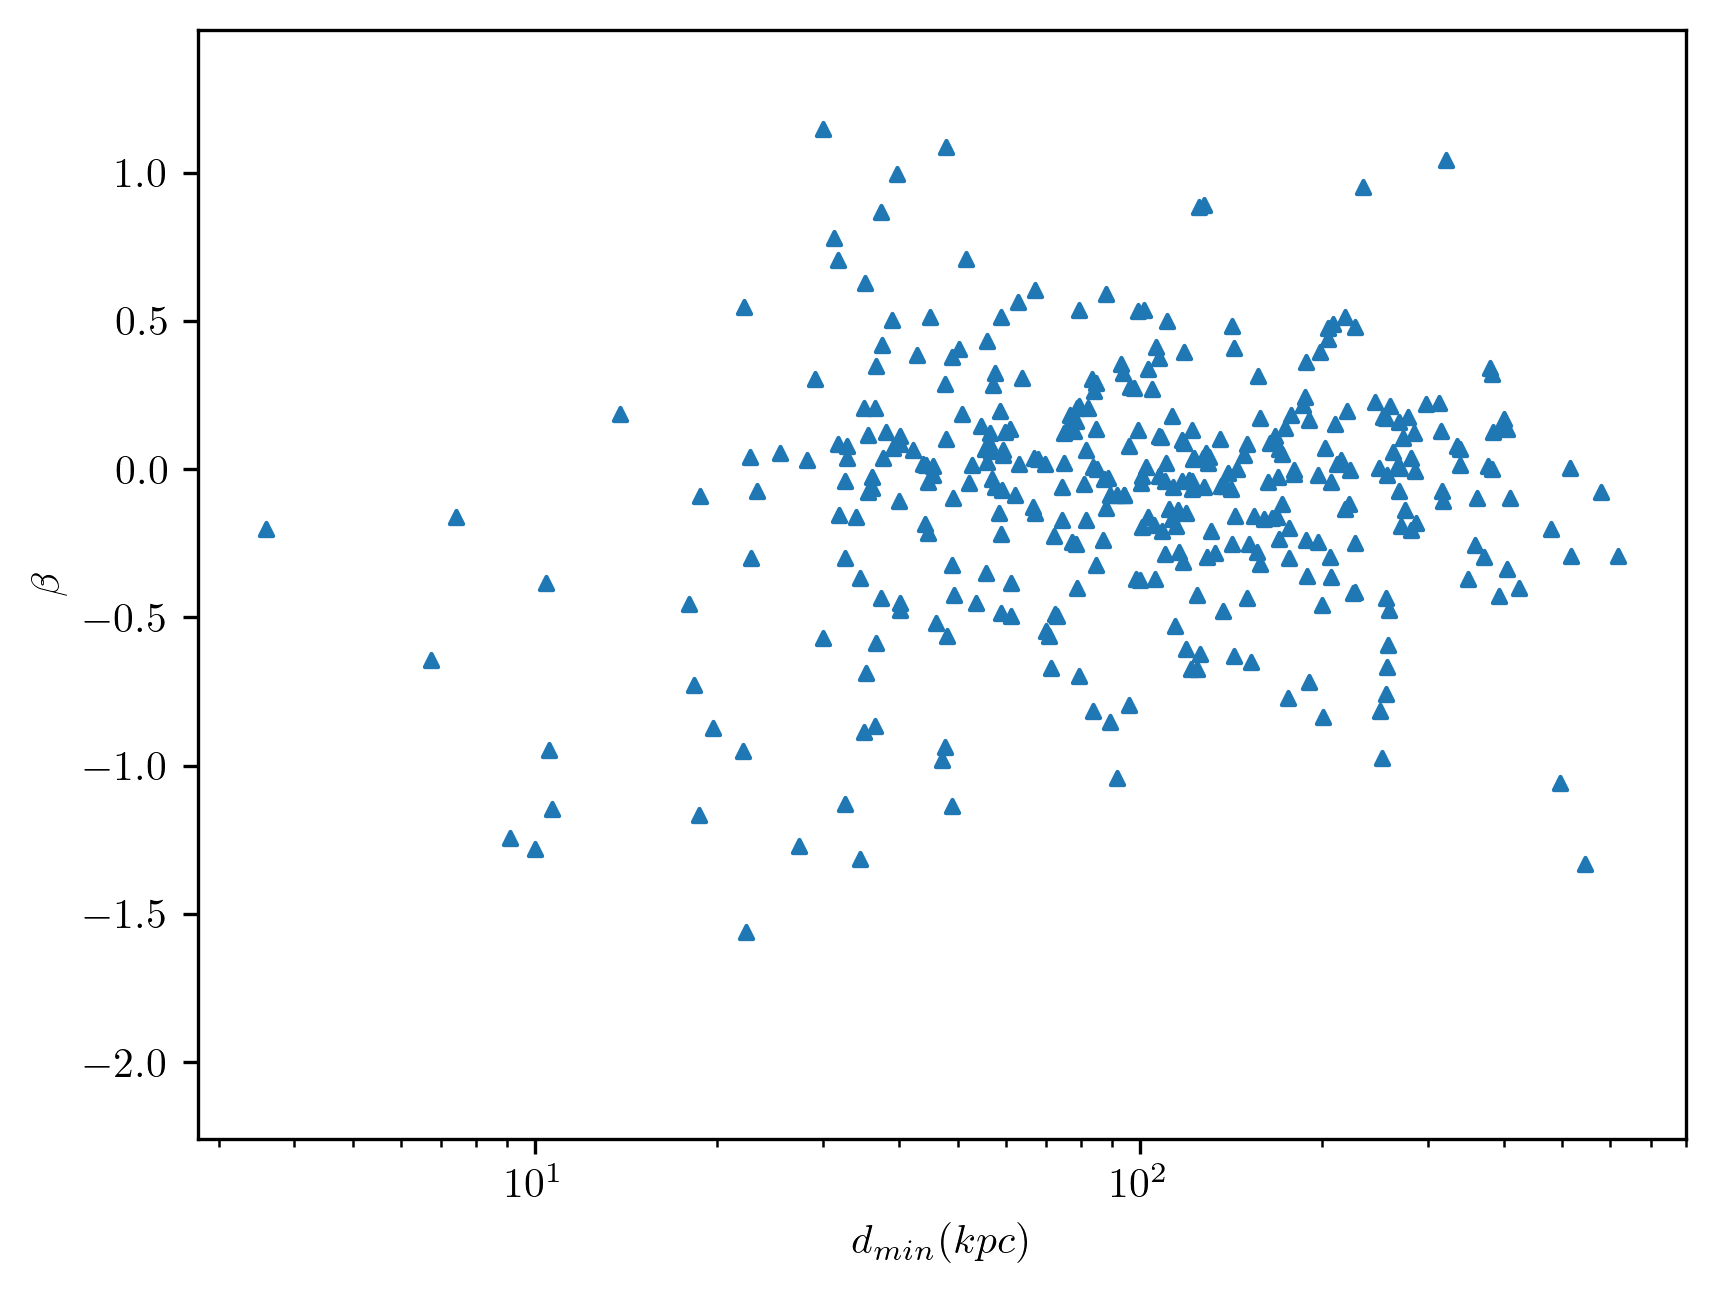

In [10]:
fig, ax = plt.subplots()

ax.set_xscale('log')

ax.scatter(
    dat[s_filt]['d_innermost'],
    dat[s_filt]['beta_r50'],
    s=10,
    marker='^'
)

ax.set_xlabel(r'$d_{min} (kpc)$')
ax.set_ylabel(r'$\beta$')

ax.set_label('Mass-Size Deviation and $R_{host}$')